# 4. Trainer (Train, Predict and Submit)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from tqdm import tqdm as tqdm

In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import lightgbm as lgb

In [87]:
import xgboost as xgb

## Ideas
- Feature to feature relationship
- [detailed-exploratory-data-analysis-with-python](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)


# PreProcess

In [3]:
from preprocess import preprocess

In [4]:
X_train, Y_train, X_test = preprocess()

# Ensemble Models
- [Titanic Top 4% with ensemble modeling](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling/notebook#Titanic-Top-4%-with-ensemble-modeling)
- [sklearn.dummy.DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

### Kfold

In [27]:
VERSION = "v2"

In [5]:
kfold = StratifiedKFold(n_splits=10)

### Gathering Different Models

In [84]:
# Modeling step Test differents algorithms
random_state = 2
classifiers = {}
args = {"random_state":random_state}

classifiers["SVC"]                        = SVC(**args)
classifiers["DecisionTreeClassifier"]     = DecisionTreeClassifier(**args)
classifiers["AdaBoostClassifier"]         = AdaBoostClassifier(DecisionTreeClassifier(**args),
                                                           random_state=random_state,
                                                           learning_rate=0.1)
classifiers["RandomForestClassifier"]     = RandomForestClassifier(**args)
classifiers["ExtraTreesClassifier"]       = ExtraTreesClassifier(**args)
classifiers["GradientBoostingClassifier"] = GradientBoostingClassifier(**args)
classifiers["MLPClassifier"]              = MLPClassifier(**args)
classifiers["KNeighborsClassifier"]       = KNeighborsClassifier()
classifiers["LogisticRegression"]         = LogisticRegression(**args)
classifiers["LinearDiscriminantAnalysis"] = LinearDiscriminantAnalysis()
classifiers["XGBoostClassifier"]          = xgb.XGBClassifier()
classifiers["LGBMClassifier"]             = lgb.LGBMClassifier(objective='binary')
classifiers["DummyRegressor_zeros"]       = DummyRegressor(strategy="constant", constant=1.)
classifiers["DummyRegressor_median"]      = DummyRegressor(strategy="median")

AttributeError: 'XGBClassifier' object has no attribute 'XGBClassifier'

In [72]:
cv_results = {}
for name, classifier in tqdm(classifiers.items()):
    cv_results[name] = cross_val_score(classifier,
                                      X_train,
                                      y = Y_train, 
                                      scoring = "accuracy",
                                      cv = kfold,
                                      n_jobs=4)

100%|██████████| 14/14 [00:28<00:00,  2.07s/it]


In [73]:
cv_mean = {}
cv_std = {}
for name, cv_result in cv_results.items():
    cv_mean[name] = cv_result.mean()
    cv_std[name]   = cv_result.std()

In [74]:
print(list(cv_results.keys()))
print(list(cv_mean.values()))
print(list(cv_std.values()))

['SVC', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'MLPClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'LinearDiscriminantAnalysis', 'XGBoostClassifier', 'LGBMClassifier', 'DummyRegressor_zeros', 'DummyRegressor_median']
[0.7578431372549019, 0.8213725490196078, 0.8198039215686274, 0.8638235294117648, 0.8644117647058824, 0.8583333333333334, 0.7815686274509803, 0.5150980392156863, 0.805, 0.855686274509804, 0.8401960784313726, 0.8681372549019608, 0.242156862745098, 0.7578431372549019]
[0.0, 0.05255816426138494, 0.05131076961823747, 0.019432797082782293, 0.008144338990564774, 0.053616337522863586, 0.07354614188754999, 0.18248740562105573, 0.015780659667166942, 0.006718369293730133, 0.03612049977024737, 0.02724449653252991, 2.7755575615628914e-17, 0.0]


In [75]:
cv_res = pd.DataFrame(
    {
        "CrossValMeans" :cv_mean.values(),
        "CrossValerrors":cv_std.values(),
        "Algorithm"     :cv_results.keys()
    })

/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


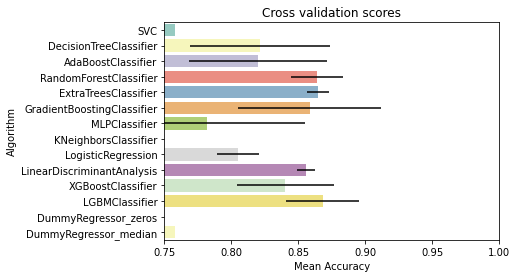

In [76]:
g = sns.barplot("CrossValMeans",
                "Algorithm",
                data = cv_res,
                palette="Set3",
                orient = "h",
                **{'xerr':cv_std.values()})
g.set_xlabel("Mean Accuracy")
g.set(xlim=(.75, 1))
g = g.set_title("Cross validation scores")

### Hyperparameter Tuning

- [TPS-June-Optuna, Pytorch (Starter)](https://www.kaggle.com/altinsoyemrecan/tps-june-optuna-pytorch-starter)
- [titanicデータをLightGBM推論](https://www.kaggle.com/currypurin/titanic-lightgbm)
- [GBDT系の機械学習モデルのパラメータチューニング奮闘記 ~ CatBoost vs LightGBM vs XGBoost vs Random Forests ~ その1
](https://qiita.com/KROYO/items/6607bc77bb465f5e9a3a)

In [13]:
# gbm.get_params()

In [14]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC)
adaDTC.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [15]:
# まずはAdaBoostClassifierのパラメータを調整する
ada_param_grid = {
    "base_estimator__criterion" : ["gini", "entropy"],
    "base_estimator__splitter" :   ["best", "random"],
    "algorithm" : ["SAMME","SAMME.R"],
    "n_estimators" :[1,2],
    "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,
                        param_grid = ada_param_grid,
                        cv=kfold,
                        scoring="accuracy",
                        n_jobs= 4,
                        verbose = 1)

gsadaDTC.fit(X_train, Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


In [16]:
gsadaDTC.best_score_

In [16]:
Y_pred = ada_best.predict(X_test)
_submission_df = pd.DataFrame([X_test.id, Y_pred]).T
_submission_df.to_csv('submissions/{}_ada_best.csv'.format(VERSION), header=None, index=False)

0.8412745098039215

In [21]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, 
                      cv=kfold, 
                      scoring="accuracy",
                      n_jobs= 4,
                      verbose = 10)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

In [28]:
Y_pred = ExtC_best.predict(X_test)
_submission_df = pd.DataFrame([X_test.id, Y_pred]).T
_submission_df.to_csv('submissions/{}_ExtC_best.csv'.format(VERSION), header=None, index=False)

/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- index

  warnings.warn(message, FutureWarning)


In [22]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, 
                     cv=kfold, 
                     scoring="accuracy",
                     n_jobs= 4, 
                     verbose = 10)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

In [29]:
Y_pred = RFC_best.predict(X_test)
_submission_df = pd.DataFrame([X_test.id, Y_pred]).T
_submission_df.to_csv('submissions/{}_RFC_best.csv'.format(VERSION), header=None, index=False)

/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- index

  warnings.warn(message, FutureWarning)


In [23]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, 
                     cv=kfold, 
                     scoring="accuracy",
                     n_jobs= 4, 
                     verbose = 10)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

In [30]:
Y_pred = GBC_best.predict(X_test)
_submission_df = pd.DataFrame([X_test.id, Y_pred]).T
_submission_df.to_csv('submissions/{}_GBC_best.csv'.format(VERSION), header=None, index=False)

/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- index

  warnings.warn(message, FutureWarning)


In [32]:
# ### SVC classifier
# SVMC = SVC(probability=True)
# svc_param_grid = {'kernel': ['rbf'], 
#                   'gamma': [ 0.001, 0.01, 0.1, 1],
#                   'C': [1, 10, 50, 100,200, 300, 1000]}

# gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, 
#                       cv=kfold, 
#                       scoring="accuracy", 
#                       n_jobs= 4, 
#                       verbose = 10)

# gsSVMC.fit(X_train,Y_train)

# SVMC_best = gsSVMC.best_estimator_

# # Best score
# gsSVMC.best_score_

In [83]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [98]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

# 試行するパラメータを羅列する
params = {
    # 'max_depth': hp.quniform("max_depth", 3, 18, 1),
    'max_depth': [3, 12, 30, 60],
    'gamma': [2, 4, 8],
    # 'reg_alpha': [0, 1, 10],
    # 'reg_lambda': [0, 0.1, 0.5, 1, 10],
    # # 'reg_lambda' : hp.uniform('reg_lambda', 0,1),
    # # 'colsample_bytree' : [0.5, 0.7, 0.9],
    # 'min_child_weight' : [2, 4, 8],
    "n_estimators": [100,200,500],
}

# params = {
#     "max_depth": [3, 5, 10, 25, 50, 75, 100],
#     "learning_rate" : [0.001,0.01,0.05,0.1],
#     "num_leaves": [100,300,900,1200],
#     "n_estimators": [100,200,500],
#     'reg_alpha': [0, 1, 10, 100],
#     'reg_lambda': [0, 1, 10, 100],
# }

gsXGB = GridSearchCV(xgb,  # 分類器を渡す
                    param_grid=params,  # 試行してほしいパラメータを渡す
                    cv=kfold,
                    scoring="accuracy", 
                    n_jobs= 4, 
                    verbose = 10)

gsXGB.fit(X_train, Y_train)  # データを渡す

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:42:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, m...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                           

In [99]:
XGB_best = gsXGB.best_estimator_

# Best score
gsXGB.best_score_

0.875

In [100]:
Y_pred = XGB_best.predict(X_test)
_submission_df = pd.DataFrame([X_test.id, Y_pred]).T
_submission_df.to_csv('submissions/{}_XGB_best.csv'.format(VERSION), header=None, index=False)

In [ ]:
gbm = lgb.LGBMClassifier(objective='binary')

# 試行するパラメータを羅列する
params = {
    "max_depth": [2, 3, 4, 5, 10, 25, 50, 75],
    "learning_rate" : [0.001,0.01,0.05,0.1],
    "num_leaves": [100,300,900,1200],
    "n_estimators": [100,200,500],
    'reg_alpha': [0, 1, 10, 100],
    'reg_lambda': [0, 1, 10, 100],
}

gsGBM = GridSearchCV(gbm,  # 分類器を渡す
                    param_grid=params,  # 試行してほしいパラメータを渡す
                    cv=kfold,
                    scoring="accuracy", 
                    n_jobs= 4, 
                    verbose = 10)

gsGBM.fit(X_train, Y_train)  # データを渡す

In [37]:
GBM_best = gsGBM.best_estimator_

# Best score
gsGBM.best_score_

In [37]:
# gbm = lgb.LGBMClassifier(objective='binary')

# # 試行するパラメータを羅列する
# params = {
#     "max_depth": [3, 5, 10, 25, 50, 75, 100],
#     "learning_rate" : [0.003, 0.03,0.06,0.1],
#     "num_leaves": [50,100,200,400, 800],
#     "n_estimators": [100,200,500],
#     'reg_alpha': [0, 1, 10, 100],
#     'reg_lambda': [0, 1, 10, 100],
# }

# gsGBM_2 = GridSearchCV(gbm,  # 分類器を渡す
#                     param_grid=params,  # 試行してほしいパラメータを渡す
#                     cv=kfold,
#                     scoring="accuracy", 
#                     n_jobs= 4, 
#                     verbose = 10)

# gsGBM_2.fit(X_train, Y_train)  # データを渡す

# GBM_best_2 = gsGBM.best_estimator_

# # Best score
# gsGBM_2.best_score_

0.8808823529411764

In [38]:
Y_pred = GBM_best.predict(X_test)
_submission_df = pd.DataFrame([X_test.id, Y_pred]).T
_submission_df.to_csv('submissions/{}_GBM_best.csv'.format(VERSION), header=None, index=False)

In [ ]:
# xgb = xgb.XGBClassifier()
# #pprint.pprint(model.get_params())
# # パラメーターを設定する
# param_grid = {"max_depth": [ 3, 6, 10,25], #10, 25,
#               "learning_rate" : [0.0001,0.001,0.01], # 0.05,0.1
#               "min_child_weight" : [1,3,6],
#               "n_estimators": [100,200,300], # 500
#               "subsample": [0.5,0.75,0.9],
#               "gamma":[0,0.1,0.2],
#               "eta": [0.3,0.15,0.10]
#              }
# # パラメータチューニングをグリッドサーチで行うために設定する
# ## このGridSearchCV には注意が必要 scoring は そのスコアを基準にして最適化する
# grid_result = GridSearchCV(estimator = model,
#                            param_grid = param_grid,
#                            scoring = 'balanced_accuracy',
#                            cv = skf,
#                            verbose=3,
#                            return_train_score = True,
#                            n_jobs = -1)
# grid_result.fit(data_set, target_set)

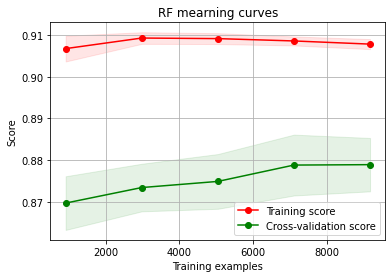

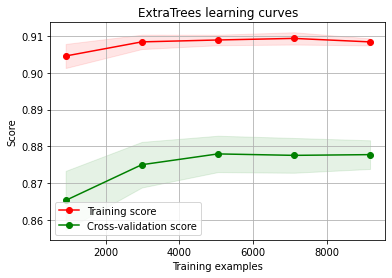

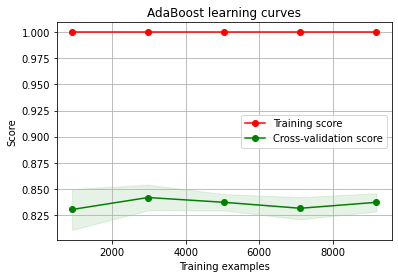

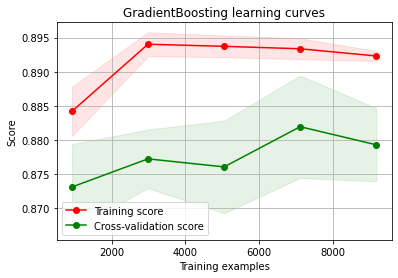

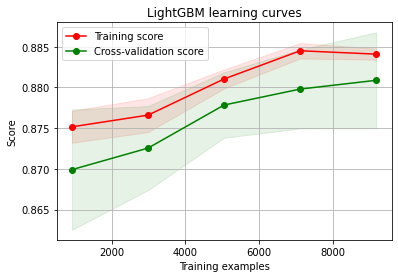

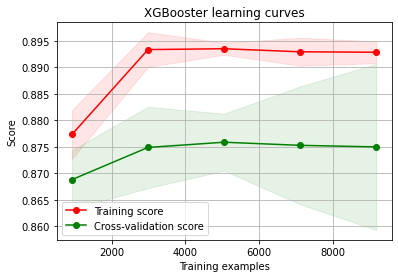

In [101]:
def plot_learning_curve(estimator,
                        title,
                        X,
                        y, 
                        ylim=None,
                        cv=None,
                        n_jobs=-1,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
# g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBM.best_estimator_,"LightGBM learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsXGB.best_estimator_,"XGBooster learning curves",X_train,Y_train,cv=kfold)

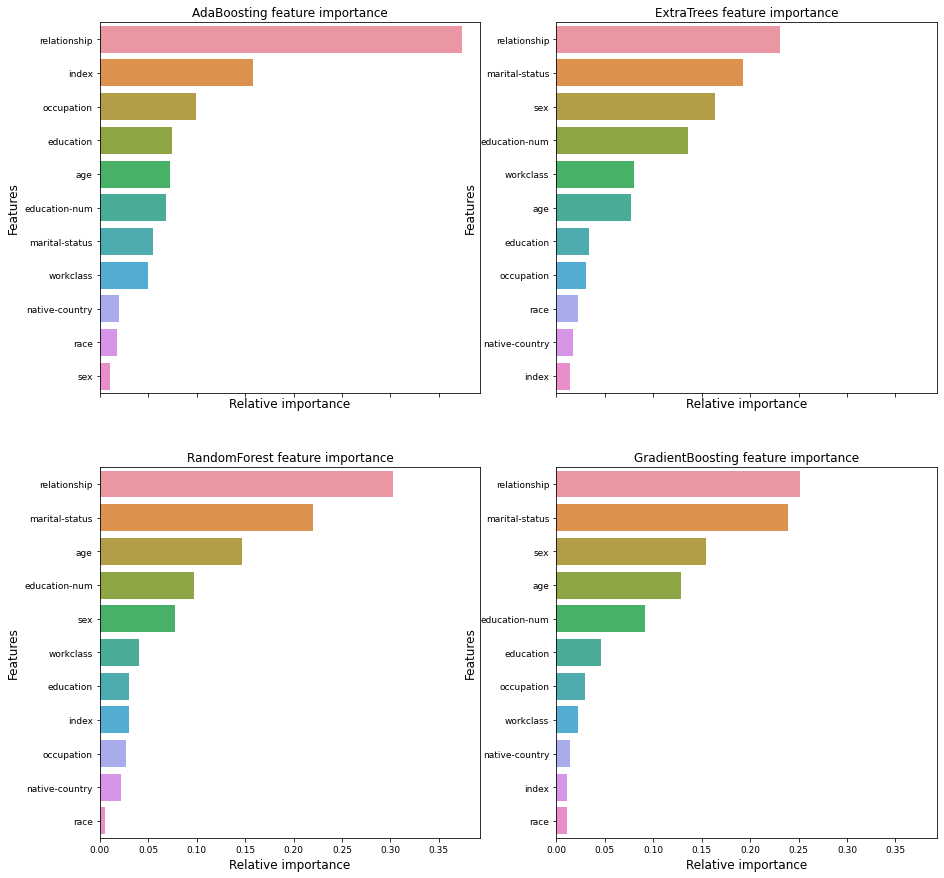

In [102]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [
    ("AdaBoosting", ada_best),
    ("ExtraTrees",ExtC_best),
    ("RandomForest",RFC_best),
    ("GradientBoosting",GBC_best),
    ("LightGBM",GBM_best),
    ("XGBooster",XGB_best),
]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [103]:
test_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
test_ExtC = pd.Series(ExtC_best.predict(X_test), name="ExtC")
# test_AdaC = pd.Series(ada_best.predict(X_test), name="Ada")
test_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")
test_GBM = pd.Series(GBM_best.predict(X_test), name="GBM")
test_XGB = pd.Series(XGB_best.predict(X_test), name="XGB")

# Concatenate all classifier results
ensemble_results = pd.concat([test_RFC,
                              test_ExtC,
                              # test_AdaC,
                              test_GBC,
                              test_GBM,
                              test_XGB,
                             ],axis=1)

/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- index

  warnings.warn(message, FutureWarning)
/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- index

  warnings.warn(message, FutureWarning)
/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- ind

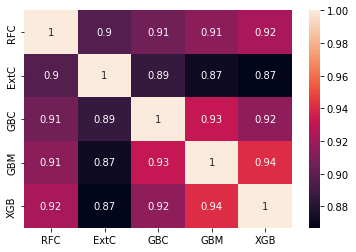

In [104]:
g= sns.heatmap(ensemble_results.corr(),annot=True)


# VotingによるEnsembleモデル作成

In [115]:
votingC = VotingClassifier(estimators=[
    ('rfc', RFC_best),
    ('extc', ExtC_best),
    # ('adac',ada_best),
    ('gbc',GBC_best),
    ('gbm-1',GBM_best),
    ('gbm-2',GBM_best),
    ('gbm-3',GBM_best),
    ('xgb-1',XGB_best),
    # ('xgb-2',XGB_best),
    # ('xgb-3',XGB_best)
], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, Y_train)
acc_votingC = round(votingC.score(X_train, Y_train) * 100, 2)
acc_votingC

89.25

In [116]:
Y_pred = votingC.predict(X_test)
_submission_df = pd.DataFrame([X_test.id, Y_pred]).T
_submission_df.to_csv('submissions/{}_voting.csv'.format(VERSION), header=None, index=False)

/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- index

  warnings.warn(message, FutureWarning)
/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- index

  warnings.warn(message, FutureWarning)
/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- ind

In [113]:
votingHard = VotingClassifier(estimators=[
    ('rfc', RFC_best),
    ('extc', ExtC_best),
    # ('adac',ada_best),
    ('gbc',GBC_best),
    ('gbm-1',GBM_best),
    ('gbm-2',GBM_best),
    ('gbm-3',GBM_best),
    ('xgb-1',XGB_best),
    ('xgb-2',XGB_best),
    ('xgb-3',XGB_best)
], voting='hard', n_jobs=4)
votingHard = votingHard.fit(X_train, Y_train)
acc_votingHard = round(votingHard.score(X_train, Y_train) * 100, 2)
acc_votingHard

89.19

In [112]:
Y_pred = votingHard.predict(X_test)
_submission_df = pd.DataFrame([X_test.id, Y_pred]).T
_submission_df.to_csv('submissions/{}_voting_hard.csv'.format(VERSION), header=None, index=False)

/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- index

  warnings.warn(message, FutureWarning)
/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- index

  warnings.warn(message, FutureWarning)
/Users/akirakawai/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- ind